<a href="https://colab.research.google.com/github/Razan-SM2/PicLingo/blob/main/testing%26evaluation_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install torch pytorch-pretrained-biggan


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.2 MB/s eta 0:00:00


In [4]:
!pip install Pillow libsixel-python

  Preparing metadata (setup.py) ... done
  Created wheel for libsixel-python: filename=libsixel_python-0.5.0-py3-none-any.whl size=12264 sha256=b7ac58155f05bfb4fd2204ffa91c63cbf455a64c96b6bb7da3edde9c09a48338
  Stored in directory: /root/.cache/pip/wheels/ad/6c/7b/db813d9aa0922435dcf04438be690eb1363b354e3f83a8aa36
Successfully built libsixel-python


In [3]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [23]:
import torch
from pytorch_pretrained_biggan import BigGAN, one_hot_from_names, truncated_noise_sample, save_as_images
import os

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
logging.basicConfig(level=logging.INFO)

# Load pre-trained model tokenizer (vocabulary)
model = BigGAN.from_pretrained('biggan-deep-256')

# Prepare input for 100 images
num_images = 5
truncation = 0.4

class_vector = one_hot_from_names([
    "banana"
] * (num_images // 1), batch_size=num_images)

noise_vector = truncated_noise_sample(truncation=truncation, batch_size=num_images)

# Convert to tensors
noise_vector = torch.from_numpy(noise_vector)
class_vector = torch.from_numpy(class_vector)

# Generate images
with torch.no_grad():
    output = model(noise_vector, class_vector, truncation)

# Create a directory to save the generated images
output_dir = "/content/generated_images"
os.makedirs(output_dir, exist_ok=True)

# Save results as png images
save_as_images(output, output_dir)

print("Generated images saved in:", output_dir)

Generated images saved in: /content/generated_images


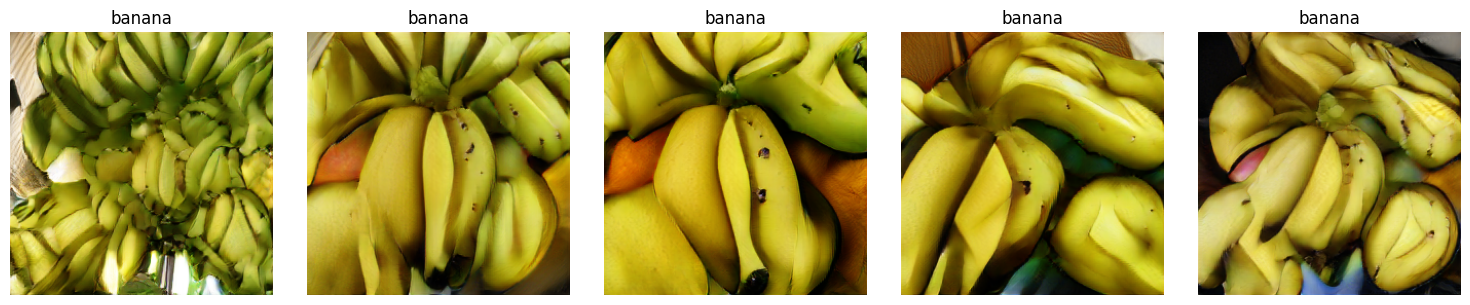

In [27]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Define the path to the generated images folder
generated_images_folder = "/content/generated_images/banana"


# Function to display images with class labels
def display_images_with_classes(folder_path, num_cols=5):
    # List all files in the folder
    image_files = os.listdir(folder_path)
    num_images = min(len(image_files), num_cols * 5)  # Display maximum of 5 rows

    # Calculate number of rows needed
    num_rows = (num_images + num_cols - 1) // num_cols

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
    axes = axes.flatten()

    # Loop through images and display them with class labels
    for i in range(num_images):
        image_path = os.path.join(folder_path, image_files[i])
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].set_title("banana")
        axes[i].axis('off')

    # Hide any remaining axes
    for j in range(num_images, num_cols * num_rows):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Display images from the generated images folder with class labels
display_images_with_classes(generated_images_folder)


In [ ]:
import shutil

# Define the path to the folder you want to save
folder_path = "/content/generated_images"  # Change this to the path of your folder

# Define the path for the zip file
zip_file_path = "/content/generated_images.zip"  # Change this to the desired path for the zip file

# Create a zip file of the folder
shutil.make_archive(zip_file_path.split('.')[0], 'zip', folder_path)

# Move the zip file to the content directory
shutil.move(zip_file_path.split('.')[0] + '.zip', '/content/')

# The zip file is now located at /content/generated_images.zip

# Download the zip file
from google.colab import files
files.download('/content/generated_images.zip')
